## 6.5 Clustering

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [9]:
%matplotlib inline

In [13]:
df = pd.read_csv(r'C:\Users\kasia\Desktop\Career Foundry\Achievement 6\World Universities Ranking\02 Data\Prepared Data\cleaned_data.csv', index_col = False)

In [15]:
df.shape

(2200, 15)

In [17]:
df.head()

,Unnamed: 0,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,0,1,Harvard University,USA,1,7,9,1,1,1,1,496.6995,5,100.00,2012
1,1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,496.6995,1,91.67,2012
2,2,3,Stanford University,USA,3,17,11,5,4,2,2,496.6995,15,89.50,2012
3,3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,496.6995,50,86.17,2012
4,4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,496.6995,18,85.21,2012


In [19]:
df = df.drop(columns = ['Unnamed: 0'])

In [34]:
df = df.drop(columns = ['institution', 'country'])

In [36]:
df.head()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,1,7,9,1,1,1,1,496.6995,5,100.00,2012
1,2,2,9,17,3,12,4,4,496.6995,1,91.67,2012
2,3,3,17,11,5,4,2,2,496.6995,15,89.50,2012
3,4,1,10,24,4,16,16,11,496.6995,50,86.17,2012
4,5,4,2,29,7,37,22,22,496.6995,18,85.21,2012


### 2. The elbow technique

In [38]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [40]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\kasia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kasia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kasia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kasia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kasia\anaconda3\Lib\site-packages\sklearn\clust

[-1216675774.1782637,
 -481735436.1205611,
 -346159023.8862931,
 -297132467.5234116,
 -270217609.3968305,
 -247663170.25766852,
 -227691182.78084785,
 -211466827.6804462,
 -200395302.56095842]

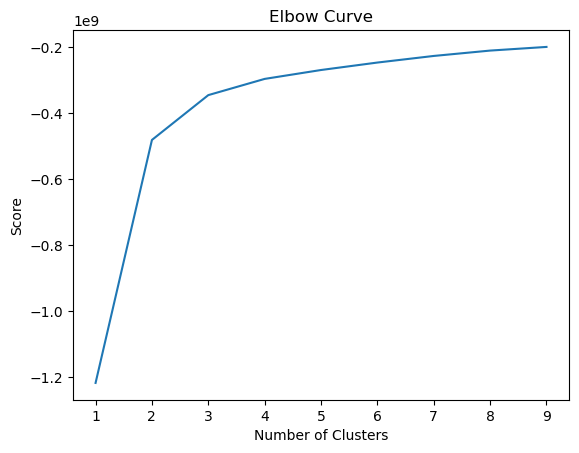

In [42]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

####  There's a bit of a jump from two to three on the x-axis and also a small jump from 3 to 4, after that, the curve straightens out. This means that the optimal count for clusters would be 4.

### 3. k-means clustering

In [46]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4)


In [48]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\kasia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [50]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\kasia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [52]:
df.head()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,clusters
0,1,1,7,9,1,1,1,1,496.6995,5,100.00,2012,1
1,2,2,9,17,3,12,4,4,496.6995,1,91.67,2012,1
2,3,3,17,11,5,4,2,2,496.6995,15,89.50,2012,1
3,4,1,10,24,4,16,16,11,496.6995,50,86.17,2012,1
4,5,4,2,29,7,37,22,22,496.6995,18,85.21,2012,1


In [54]:
df['clusters'].value_counts()

clusters
3    691
0    589
2    465
1    455
Name: count, dtype: int64

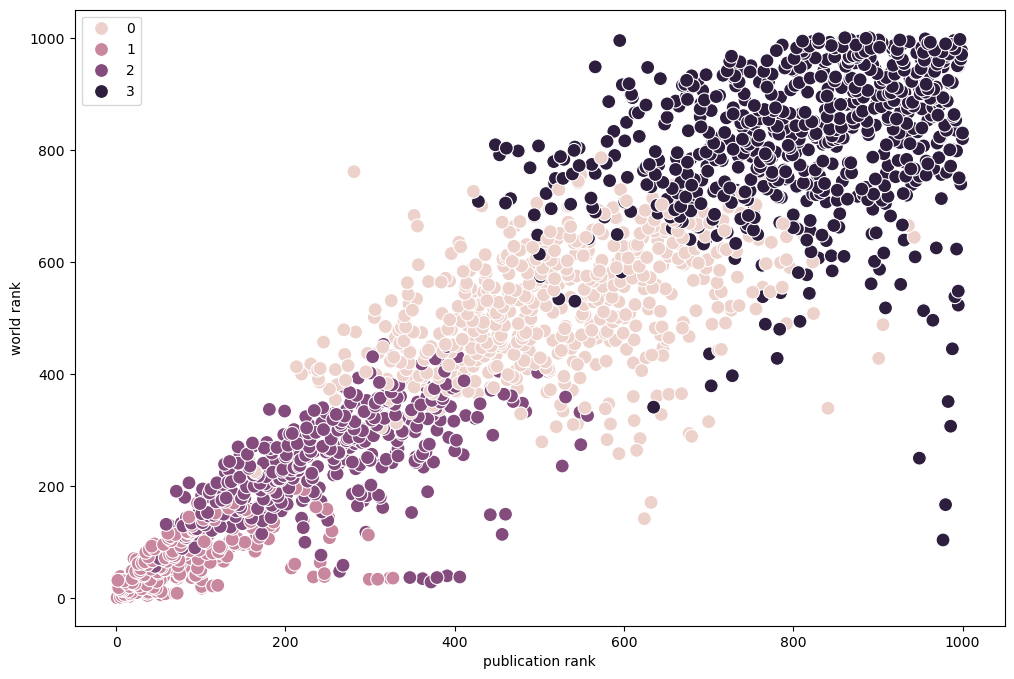

In [56]:
# Plot the clusters for the "publications" and "world_rank" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['publications'], y=df['world_rank'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('publication rank') # Label x-axis.
plt.ylabel('world rank') # Label y-axis.
plt.show()

In [66]:
plt.show()

In [84]:
# Save the plot as a file
plt.savefig('cluster_plot.png', format='png', dpi=300)

<Figure size 640x480 with 0 Axes>

####  The first cluster, in pink (coded as “1” in the legend), is the least populated cluster. It gathers the data points at top of the both world and publication rank, mainly between 0 to 200 with some outliers between 200-400 on the x-axis. It's the cluster with the top universities. The second cluster, in purple (coded as “2” in the legend), includes mailny points with ranks between 200 to 400 with some outliers as well. It's a second in size group. The third cluster, in very light pink (coded as “0” in the legend), is 3rd in size and seems to be quite scattered on the plot. It contains the points starting from 400 and doesn't go above 800 on the y-axis whereas on the x-axis it starts to appear already around 200 rank and goes past 800. The fourth cluster in dark purple (coded as "3" in the legend), it is the most populated cluster and also seems to be fairly scattered around the plot. On the world rank axis starts to appear already in the first 200 but only as extreme values, the most of the data points are in the 800-1000 group. As for the y-axis (publication rank) data point appear between 400-1000.

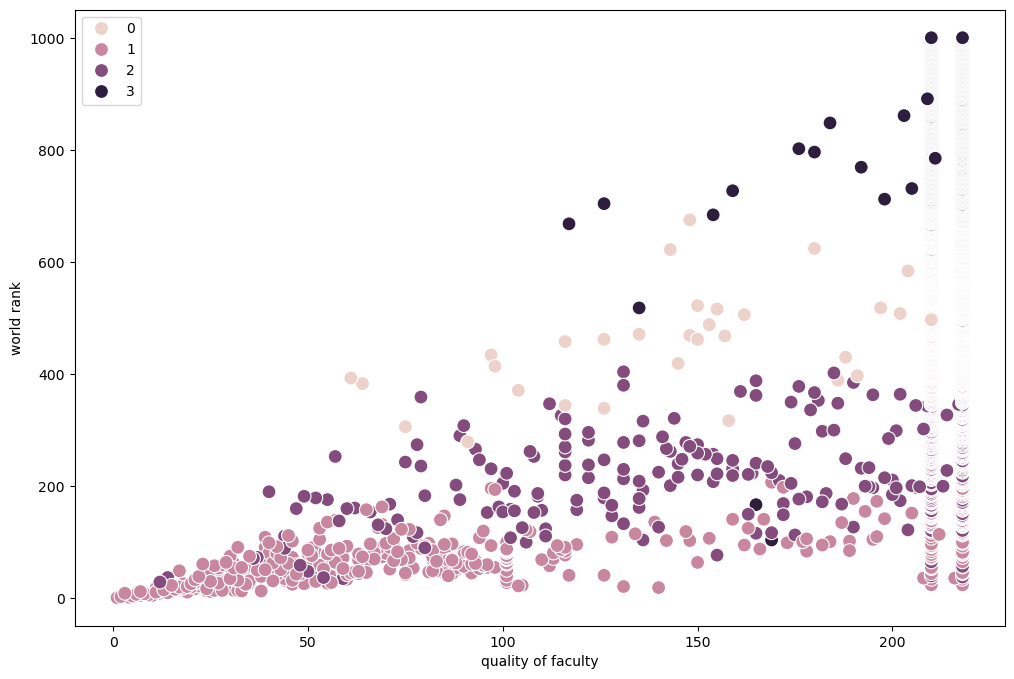

In [92]:
# Plot the clusters for the "quality_of_faculty" and "world_rank" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['quality_of_faculty'], y=df['world_rank'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('quality of faculty')
plt.ylabel('world rank')
plt.show()

##### It seems the quality of the faculty doesn't have a big impact on the world rank, all the clusters are pretty scattered around the plot.

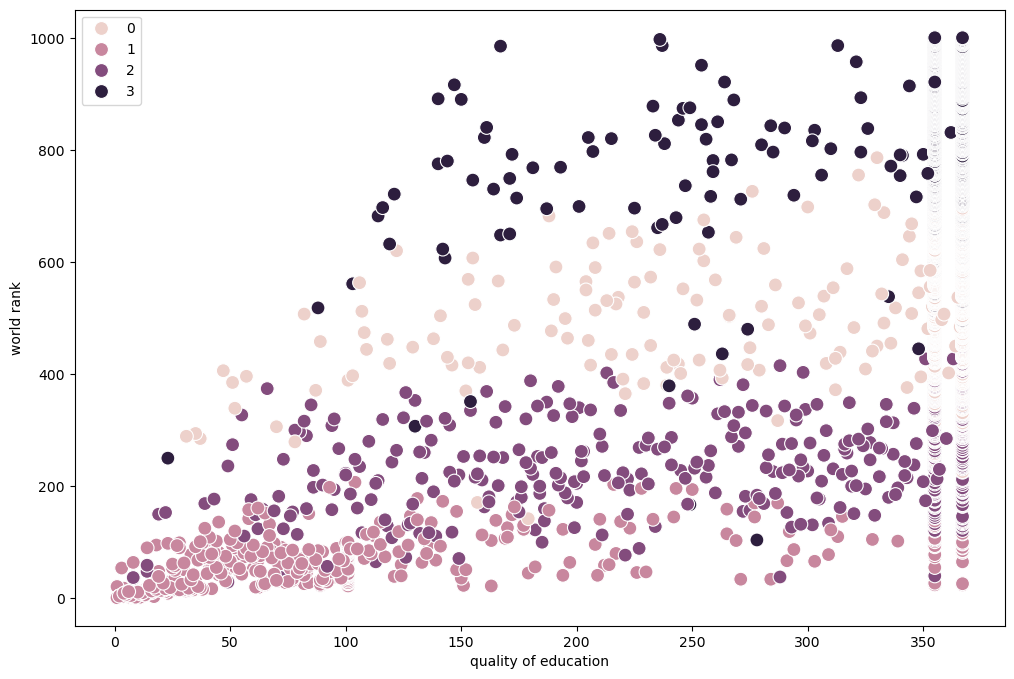

In [96]:
# Plot the clusters for the "quality_of_education" and "world_rank" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['quality_of_education'], y=df['world_rank'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('quality of education')
plt.ylabel('world rank')
plt.show()

#### It's a similar situation with the quality of the education, it also doesn't seem to have an impact on the world rank, data points are scattered on the x-axis.

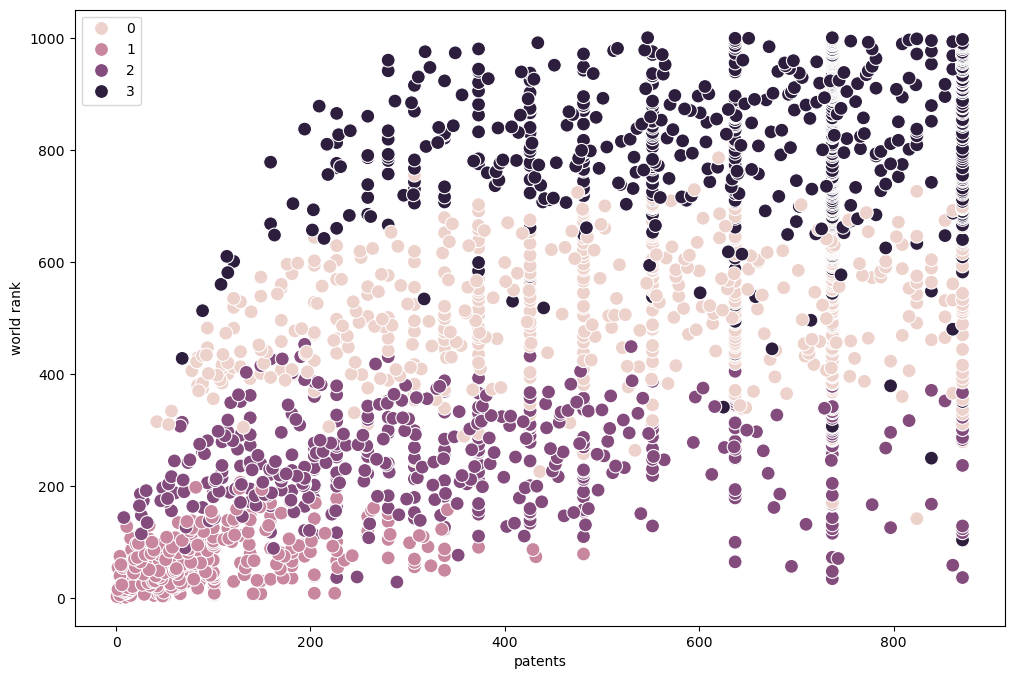

In [99]:
# Plot the clusters for the "patents" and "world_rank" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['patents'], y=df['world_rank'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('patents')
plt.ylabel('world rank')
plt.show()

#### The first cluster, in pink (coded as “1” in the legend), indicates universities with high patent counts and excellent world rankings. These are the top-performing universities with a strong emphasis on patents. They have the best world rankings, indicating high prestige and significant contributions to research and development. The three remaining clusters are fairly scattered around the plot, meaning they have varrying patent activities. 


In [101]:
# Save the plot as a file
plt.savefig('patents.png', format='png', dpi=300)

<Figure size 640x480 with 0 Axes>

In [90]:
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'

In [104]:
df.groupby('cluster').agg({'publications':['mean', 'median'], 
                         'quality_of_faculty':['mean', 'median'], 
                         'quality_of_education':['mean', 'median'],
                          'patents':['mean', 'median']})

publications        quality_of_faculty         \
                    mean median               mean median   
cluster                                                     
dark purple   808.311143  825.0         213.136035  210.0   
light pink    517.434635  513.0         210.200340  210.0   
pink           71.991209   60.0          81.213187   67.0   
purple        248.883871  243.0         183.907527  210.0   

            quality_of_education            patents         
                            mean median        mean median  
cluster                                                     
dark purple           344.753980  355.0  637.467438  703.0  
light pink            331.662139  355.0  512.047538  552.0  
pink                  100.171429   81.0   89.876923   75.0  
purple                271.116129  319.0  366.412903  338.0

#### The pink cluster has the best stats in all categories, it's always in the first 100th in the ranking.